# Digit Recognizer Web Application

Loading Data

In [1]:
#importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [6]:
#loading the training dataset
df=pd.read_csv('data/dataset.csv')

In [7]:
df.shape

(42000, 785)

In [8]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#loading the testing dataset
test=pd.read_csv('data/dataset_test.csv')

In [11]:
test.shape

(28000, 784)

In [12]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating Images out of Data

In [13]:
X_train=df.iloc[:,1:].values.astype('float32')
Y_train=df.iloc[:,0].values.astype('int32')
X_test=test.values.astype('float32')

In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
Y_train

array([1, 0, 1, ..., 7, 6, 9])

In [16]:
#Normalizing the data
X_train = X_train / 255.0
test = test / 255.0

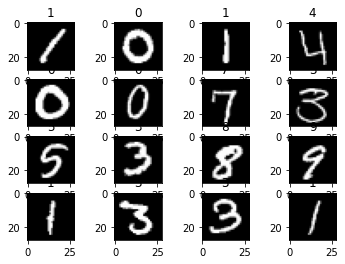

In [45]:
#plotting the digits
X_train = X_train.reshape(-1, 28, 28)
for i in range(0, 16):
    plt.subplot(4,4,(i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(Y_train[i]);

In [47]:
X_train.shape

(42000, 28, 28)

In [49]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(-1, 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [50]:
X_test = X_test.reshape(-1, 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

Modelling using CNN

In [52]:
from keras.utils.np_utils import to_categorical
Y_train= to_categorical(Y_train, num_classes = 10)
Y_train.shape

(42000, 10)

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_val,y_train,y_val = train_test_split(X_train, Y_train, test_size=.2, random_state=42)

In [56]:
#importing Keras libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [57]:
# Initialising the Sequential Classifier 
clf = Sequential()

In [60]:
# convolution
clf.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
clf.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
# pooling
clf.add(MaxPool2D(pool_size=(2,2)))
clf.add(Dropout(0.25))

# convolution
clf.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
clf.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# pooling
clf.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
clf.add(Dropout(0.25))

# Flattening
clf.add(Flatten())

# full connection
clf.add(Dense(256, activation = "relu"))
clf.add(Dropout(0.5))
clf.add(Dense(10, activation = "softmax"))

In [61]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [62]:
# Compile the model
clf.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [63]:
# fitting the CNN to the images
from keras.preprocessing import image
datagen= image.ImageDataGenerator()
batches = datagen.flow(x_train, y_train, batch_size=32)
val_batches=datagen.flow(x_val, y_val, batch_size=32)
hmod = clf.fit_generator(batches, epochs=1, validation_data=val_batches, 
                    steps_per_epoch=X_train.shape[0] // 32,validation_steps=32)

Instructions for updating:
Please use Model.fit, which supports generators.
1050/1312 [=======================>......] - 130s 124ms/step - loss: 0.2159 - accuracy: 0.9327 - val_loss: 0.0593 - val_accuracy: 0.9834


Verifying

In [64]:
# Predict the values from the validation dataset
y_pred = clf.predict(x_val)

In [65]:
#Converting predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
#Converting validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
#For confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

In [66]:
confusion_mtx

array([[811,   0,   0,   0,   0,   0,   3,   0,   0,   2],
       [  0, 904,   1,   1,   1,   0,   1,   0,   1,   0],
       [  0,   5, 832,   1,   5,   0,   1,   1,   1,   0],
       [  1,   0,   3, 924,   0,   3,   0,   3,   0,   3],
       [  1,   1,   0,   0, 813,   0,   6,   1,   0,  17],
       [  0,   0,   0,   7,   0, 686,   7,   0,   0,   2],
       [  2,   0,   0,   0,   0,   1, 782,   0,   0,   0],
       [  0,   1,  10,   1,   1,   0,   0, 874,   2,   4],
       [  4,   3,   5,   2,   4,   2,   2,   1, 808,   4],
       [  1,   0,   1,   1,   2,   4,   0,   2,   0, 827]], dtype=int64)

Saving in .h5 format for later use

In [67]:
from keras.models import load_model

In [68]:
clf.save('Digit_Recognizer_CNN_Model.h5')